# Animations

In [1]:
import glob
import datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/RUN01_1m_20020101_20051231_ptrc_T.nc'
#FName = '_data/RUN01_1m_20020101_20051231_ptrc_T.nc'
L=0; lev1 = np.arange(34, 90, 4)

In [6]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(60)]

In [7]:
ptrc_obj = nc.Dataset(FName)
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [21]:
def init():
    plt.cla(); ax1=fig.gca()
    ax1.plot(1, 1,linewidth=0)
def movie_Ba(time_step):
    print('Frame '+str(time_step))
    plt.cla()
    ax=fig.gca()
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
    proj.contour(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, linewidths=0.5, colors=('gray',))
    
    CBar=proj.colorbar(CS, location='bottom', size='2%', pad='3%', ticks=lev1)
    CBar.set_label('nM', fontsize=10)
    CBar.ax.tick_params(axis='x', length=16)
    ax.set_title('Time: '+date_list[time_step].strftime("%Y-%m-%d"), fontsize=15)

Frame 0


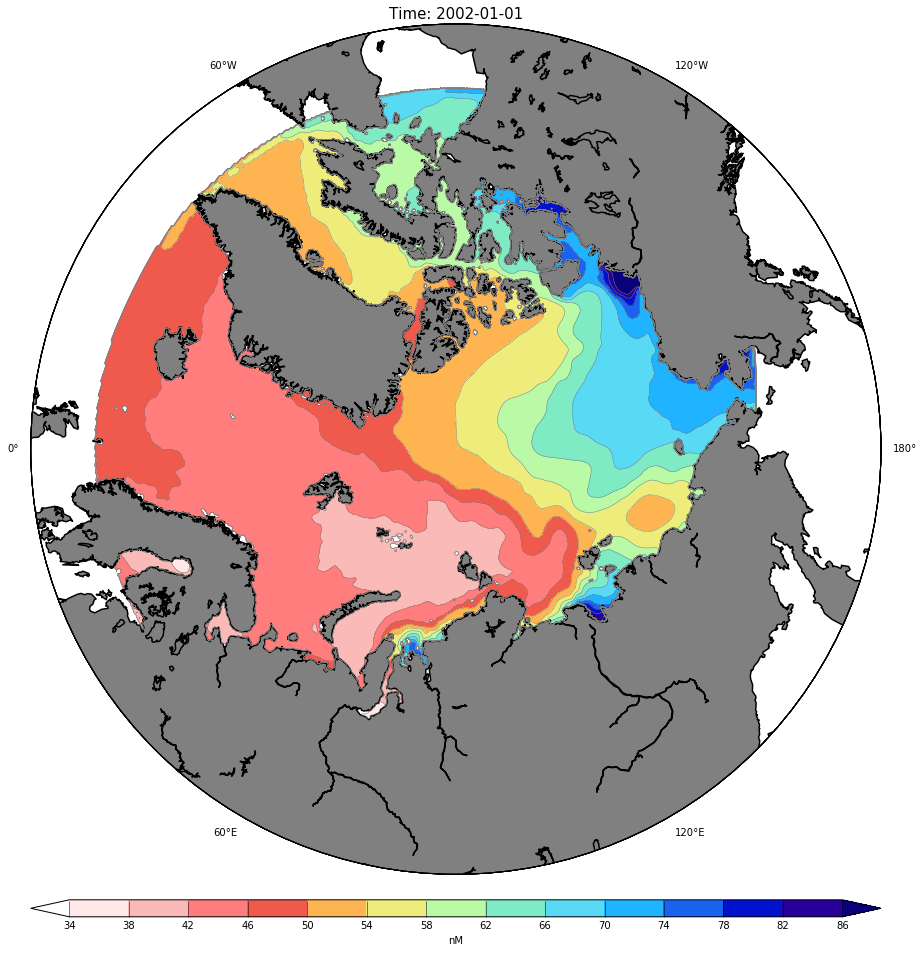

In [23]:
fig=plt.figure(figsize=(16, 16))
movie_Ba(0)

Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
Frame 13
Frame 14
Frame 15
Frame 16
Frame 17
Frame 18
Frame 19
Frame 20
Frame 21
Frame 22
Frame 23
Frame 24
Frame 25
Frame 26
Frame 27
Frame 28
Frame 29
Frame 30
Frame 31
Frame 32
Frame 33
Frame 34
Frame 35
Frame 36
Frame 37
Frame 38
Frame 39
Frame 40
Frame 41
Frame 42
Frame 43
Frame 44
Frame 45
Frame 46
Frame 47


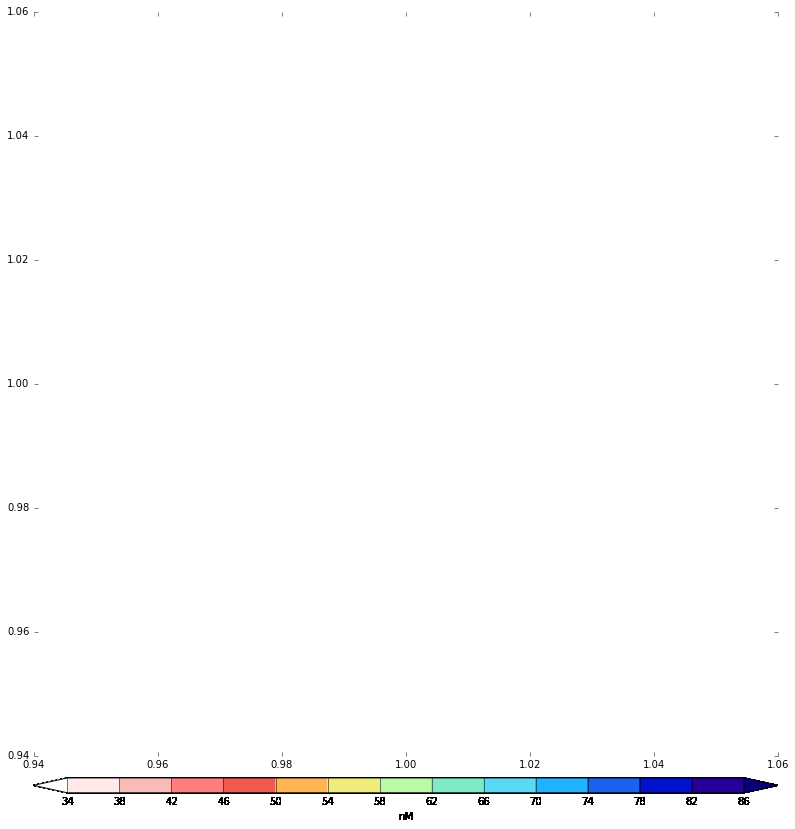

In [24]:
fig=plt.figure(figsize=(14, 14))
ani_obj=animation.FuncAnimation(fig, movie_Ba, range(48), init_func=init, interval=1250, blit=False)
#writer_obj=animation.FFMpegFileWriter()
ani_obj.save('Barium_2002_2005_1m.mov', metadata={'author':'GEOTRACES'})